## Function to fetch the data

In [1]:
# Libraries:
import os
import tarfile
import urllib

# Creating useful variables:
download_root = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = download_root + "datasets/housing/housing.tgz"

# Function:
def fetch_housing_data(housing_url = HOUSING_URL, housing_path = HOUSING_PATH):
    os.makedirs(housing_path, exist_ok=True)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [2]:
# Running the function:
fetch_housing_data()

## Function to load the data

In [3]:
import pandas as pd

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, 'housing.csv')
    return pd.read_csv(csv_path)

In [4]:
# Creating the DataFrame:
housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


OBS.: "There are 20,640 instances in the dataset, which means that it is fairly small by MAchine Learning standards, but ir's perfect to get started. Notice that the total_bedrooms atribute has only 20,433 nonnull vlaues, meaning that 207 districts are missing this feature. We will need to take care of this later.

## problems to deal with:
	- total_bedrooms null values (207 districts are missing)

"All attributes are numerical, except the ocean_proximity field. Its type is object, so it could hold any kind of python object. But since you loaded this data from a CSV file, you know that it must be a text attribute. When you looked at the top five rows, you probably noticed that the values in the ocean_proximity column were repetitive, which means that it is probably a categorical attribute. You can find out what categories exist and how many districts belong to each category by using the value_counts() method:

In [6]:
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [7]:
# The describe() method shows a summary of the numerical attributes:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


"The count, mean, min, and max rows are self explanatory. Note that the null values are ignored (so, for example, the count of the total_bedrooms is 20,433, not 20,640).

The std row shows the standard deviation, which measures how dispersed the values are. The 25%, 50%, 75% rows show the corresponding percentiles: a percentile indicates the value below which a given percentage of observations in a group of observations fall. For example, 25 of the districts have a housing_median_age lower that 18, while 50% are lower than 29 and 75% are lower than 37. These are often called the 25th percentile (or first quartile), the median, and the 75th percentile (or third quartile).

## histogram

"Another quick way to get a feel of the type of data you are dealing with is to plot a histogram for each numerical attribute. A histogram shows the number of instances (on the certical axis) that have a given value range (on the horizonal axis). You can either plot this one attribute at a time, or you can call the hist() method on the whole dataset (as shown in the following code example), and it will plot a histogram for each numerical attribute.

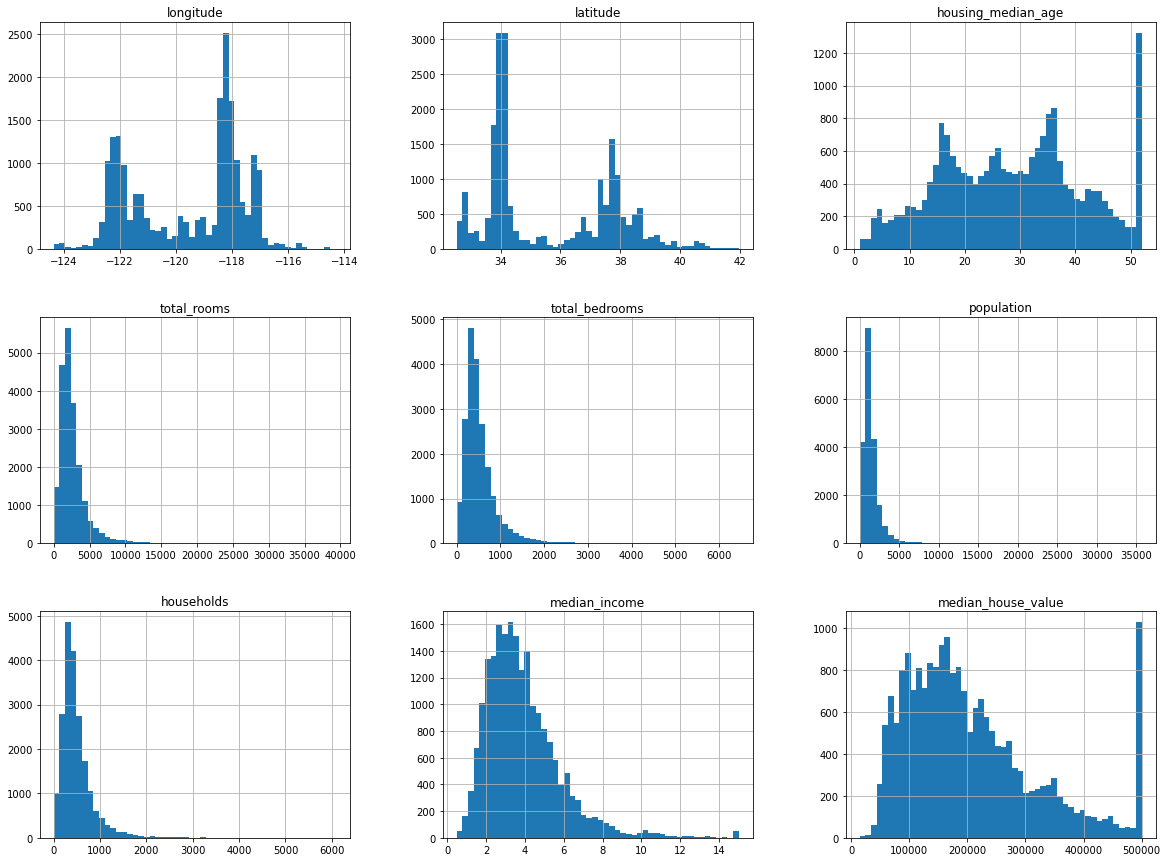

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))
plt.show()

OBS.: "The hist() method relies on Matplotlib, which in turn relies on a user-specified graphical backend to draw on your screen. So, before you can plot anything, you need to specify which backend Matplotlib should use. The simplest option is to use Jupyter's magic command %matplotlib inline. This tells Jupyter to set up Matplotlib so it uses Jupyter's own backend. Plots are then rendered within the notebook itself. Note that calling show() is optional in a Jupyter notebook, as Jupyter will automatically display plots when a cell is executed.

## Few things to notice on these histograms:

1 -First, the median income attribute does not look like it is expressed in US dollars (USD). After checking with the team that collected the data, you are told that the data has been scaled and capped at 15 (actually 15.0001) for higher median incomes, and at 0.5 (actually, 0.4999) for lower median incomes. The numbers represent roughly tens of thousands of dollars (e.g., 3 actually means about $ 30,000). Working with preprocessed attributes is common in Machine Learning, and it is not necessarily a problem, but you should try to understand how the data was computed.

2 - The housing median age and the median house value were also capped. The latter may be a serious problem since it is your target attribute (your labels). Your Machine Learning algorithms may learn that prices never go beyond that limit. You need to check with your client team (the team that will use your system's output) to see if this is a problem or not. If they tell you that they need precise predictions even beyind $500,000, then you have two options.

	a - Collect proper labels for the districts whose labels were capped.
    b - Remove those districts from the training set(and also from the test set, since your system 		   should not be evaluated poorly if it predicts values beyond $500,000).

3 - These attributes have very different scales. We will discuss this later in this chapter, when we explore feature scaling.

4 - Finally, many histograms are tail-heavy: they extend much farther to the right of the median than to the left. This may make it a bit harder for some Machine Learning algorithms to detect patterns. We will try transforming these attributes later on to have more bell-shaped distributions.
   

## Create a test set **

"It may sound strange to voluntarily set aside part of the data at this stage. After all, you have only taken a quick glance at the data, and surely you should learn a whole lot more about it before you decide what algorithms to use, right?

This is true, but your brain is an amazing pattern detection system, which means that it is highly prone to overfitting: if you look at the test set, you may stumble upon something seemingly interesting pattern in the test data that leads you to select a particular kind of Machine Learning model.

When you estimate the generalization error using the test set, your estimate will be too optimistic, and you will launch a system that will not perform as well as expected. This is called data snooping bias.".

"Creating a test set is theoretically simple: pick some instances randomly, typically 20% of the dataset (or less if your dataset is very large), and set them aside. This is generally fine if your dataset is large enough (especially relative to the number of attributes), but if it is note, you run the risk of introducing a significant sampling bias.

When a survey company decides to call 1,000 people to ask them a few questions, they don't just pick 1,000 people randomly in a phone book. They try to ensure that these 1,000 people are representative of the whole population. For example, the US population is 51.3% females and 48.7% males, so a well-conducted survey in the US would try to maintain this ration in the sample: 513 female and 487 male. This is called stratified sampling: the population is divides into homogeneous subgroups called strata, and the right number of instances are sampled from each stratum to guarantee that the test set is representative of the overall population. If the people running the survey used purely random sampling, there would be about 12% chance of samplig a skewed test set that was either less than 49% female or more than 54% female. Either way, the survey results would be significantly biased.

About this project data...

"Suppose you chatted with experts who told you that the median income is a very important attribute to predict median housing prices. You may want to ensure that the test set is representative of the various categories of incomes in the whole dataset. Since the median income is a continuous numerical attribute, you first need to create an income category attribute.

Let's look at the median income histogram more closely:"

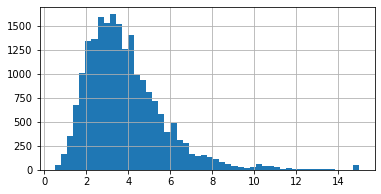

In [9]:
%matplotlib inline
housing['median_income'].hist(bins=50, figsize=(6, 3))
plt.show()

"Most median income values are clustered around 1.5 to 6 (i.e., $15,000-$60,000), but some median incomes go far beyond 6. It is important to have a sufficient number of instances in your dataset for each stratum, or else the estimative of a stratum's importance may be biased.

This means that you should not have too many strata, and each stratum should be large enough.

The following code uses the pd.cut() function to create an income category attribute with five categories (labeled from 1 to 5): category 1 ranges from 0 to 1.5 (i.e., lessthan $15,000), category 2 from 1.5 to 3, and so on:"

In [10]:
import numpy as np

In [11]:
housing['income_cat'] = pd.cut(housing['median_income'],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5]
                              )

<AxesSubplot:>

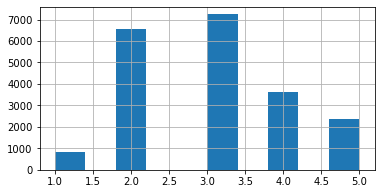

In [12]:
# Representation of the income categories:
housing['income_cat'].hist(figsize=(6, 3))

In [13]:
'''
Now you are ready to do stratified sampling based on the income category. For this you can use 
Scikit-Learn's StratifiedShuffledSplit class:
'''
from sklearn.model_selection import StratifiedShuffleSplit
random_state = 42
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state = random_state)
for train_index, test_index in split.split(housing, housing['income_cat']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [14]:
'''Let's see if this worked as expected. You can start looking at the income category proportions 
in the test set:'''

strat_test_set['income_cat'].value_counts() / len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114583
1    0.039729
Name: income_cat, dtype: float64

In [15]:
#Now you can remove the income_cat attribute so the data is back to its original state:
for set_ in (strat_train_set, strat_test_set):
    set_.drop('income_cat', axis=1, inplace=True)

We spent quite a bit of time on test set generation for a good reason: this is an often neglected but critical part of a Machine Learning project. Moreover, many of these ideas will be useful later when we discuss cross-validation. Now it's time to move on to the next stage: exploring data.

## Discover and Visualize the Data to Gain Insights

"So far you have only taken a quick glance at the data to get a general understanding of the kind of data you are manipulating. Now the goal is to go into a little more depth."

In [16]:
'''
First, make sure you have put the test set aside and you are only exploring the training set.

Also, if the training set is very large, you may want to sample and exploration set, to make
manipulations easy and fast. In your case, the set is quite small, so you can just work directly
on the full set. Let's create a copy so that you can play with it without harming the training set:
'''

housing = strat_train_set.copy()

### Visualizing Geographical Data

"Since there is a geographical information (latitude and longitude), it is a good idea to create a scatterplot of all districts to visualize the data:"

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

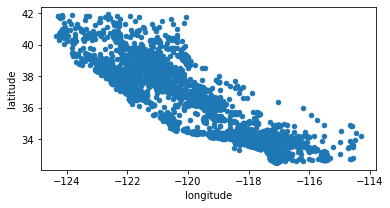

In [17]:
housing.plot(kind='scatter', x='longitude', y='latitude', figsize=(6, 3))

"This looks like california all right, but other than that it is hard to see any particular pattern. Setting the alpha option to 0.1 makes it much easier to visualize the places where there is a high density of data points:"

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

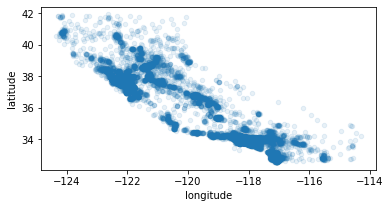

In [18]:
housing.plot(kind='scatter', x='longitude', y='latitude', figsize=(6, 3), alpha=0.1)

"Now that's much better: you can clearly see the high-density areas, namely the Bay Area and around Los Angeles and San Diego, plus a long line of fairly high density in the Central Valley, in particular around Sacramento and Fresno."

"Our brains are very good at spotting patterns in pictures, but you may need to play around with visualization parameters to male the patterns stand out.

Now let's look at the housing prices. The radius of earth circle represents the district's population (option s), and the color represents the price (option c). We will use a predefined color map (option cmap) called jet, which ranges from blue (low values) to red (high values):"

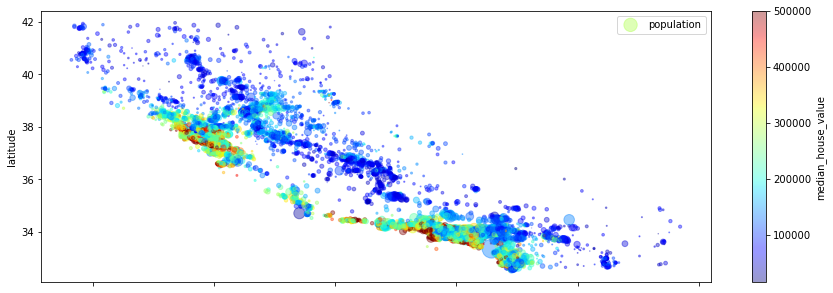

In [19]:
housing.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4,
                  s=housing['population']/100, label='population', figsize=(15, 5),
                  c='median_house_value', cmap=plt.get_cmap('jet'), colorbar=True
                  )
plt.legend()

"This image tells you that the housing prices are very much related to the location (e.g., close to the ocean) and to the population density, as you probably knew already. A clustering algorithm should be useful for detecting the main cluster and for adding new features that measures the proximity to the cluster centers. The ocean proximity attribute may be usefull as well, although in Northern California the housing prices in coastal districts are not too high, so it is not a simple rule."

### Looking for Correlations

"Since the dataset is not too large, you can easily compute the standard correlation coefficient (also called Pearson's r) between every pai of attributes using the corr() method:"

In [20]:
corr_matrix = housing.corr()

In [21]:
# Now let's look at how much each attribute correlates with the median house value:
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

"The correlation coefficient ranges from -1 to 1. When it is close to 1, it means that there is a strong positive correlation; for example, the median house value tends to go up when the median income goes up. When the coefficient is close to -1, it means that there is a strong negative correlation; you can see a small negative correlation between the latitude and the median house value (i.e., prices have a slight tedency to go down when you go north).

Finally, coefficients close to 0 mean there is no linear correlation.

Warning: "The correlation coefficient only measures linear correlation ('if x goes up, then y generally goes up/down'). It may completely miss out on nonlinear relationships (e.g., 'if x is close to 0, then y generally goes up').

"Another way to check for correlation between attributes is to use the pandas scatter_matrix() function, which plots every numerical attribute against every other numerical attribute. Since there are now 11 numerical attributes, you would get 11² = 121 plots, which would not fit on a page - so let's just focus on a few promising attributes that seem most correlated with the median housing value:"

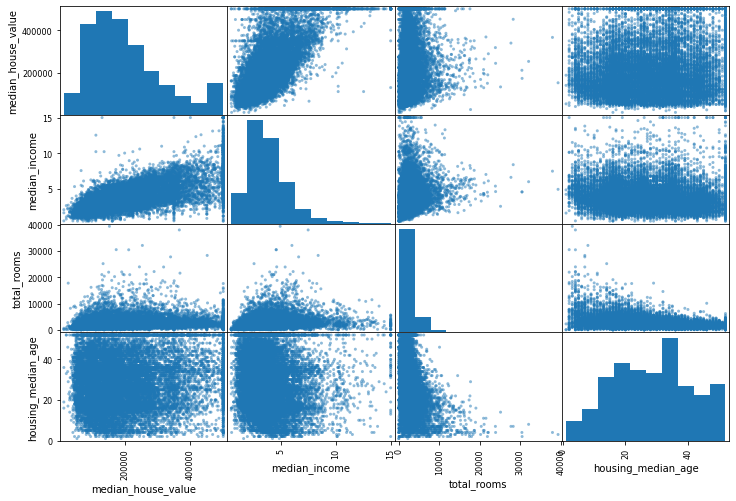

In [22]:
from pandas.plotting import scatter_matrix
attributes = ['median_house_value', 'median_income','total_rooms','housing_median_age']
scatter_matrix(housing[attributes], figsize=(12,8));

"The main diagonal (top left to bottom right) would be full of straight lines if pandas plotted each variable against itself, which would not be very useful. So instead pandas displays a histogram of each attribute (other options are avaiable; see the pandas documentaions for more details)."

<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

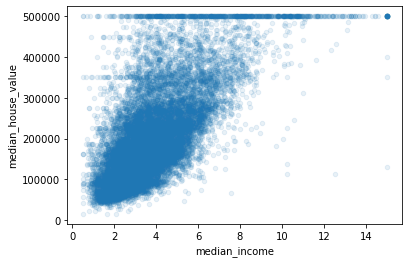

In [23]:
'''
The most promising attribute to predict the median house value is the median income, so let's
zoom in on their correlation scatterplot:
'''
housing.plot(kind='scatter', x='median_income', y='median_house_value', alpha=0.1)

"This plot reveals a few things.

First, the correlation is indeed very strong; you can claearly see the upward trend, and the points are not too dispersed.

Second, the price cap that we noticed earlier is clearly visible as a horizontal line around $450,000, another around $350,000, perhaps one around $280,000, and a few ore below that.

You may want to try removing the corresponding districts to prevent your algorithms from learning to reproduce these data quirks."

### Experimenting with Attribute Combinations

"One last thing you may want to do before preparing the data for Machine Learning algorithms is to try out various attribute combinations.

For example, the total number of rooms in a district is not very useful if you don't know how many households there are. What you really want is the number of rooms per household. Similarly, the total number of bedrooms by itself is not very useful: you probably want to compare it to the number of rooms. And the populaation per holsehold also seems like an interesting attribute combination to look at. Let's create these new attributes:"

In [24]:
housing['rooms_per_household'] = housing['total_rooms'] / housing['households']
housing['bedroms_per_room'] = housing['total_bedrooms'] / housing['total_rooms']
housing['population_per_household'] = housing['population'] / housing['households']


In [25]:
# And now let's take a look at the correlation matrix again:
corr_matrix = housing.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687160
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedroms_per_room           -0.259984
Name: median_house_value, dtype: float64

"Hey, not bad! The new bedrooms_per_room attribute is much more corrrelated with the median house value than the total number of rooms or bedrooms. Apparently houses with a lower bedroom/room ratio tend to be more expensive. The number of rooms per household is also more informative than the total number of rooms in a district - obviously the larger the houses, the more expensive they are.

This round of exploration does not have to be absolutely thorough; the point is to start off on the right foot and quickly gain insights that will help you get a first reasonably good prototype. But this is an iterative process. once you get a prototype up and running, you can analyze its output to gain more insights and come back to this exploration step."

## Prepare the Data for Machine Learning Algorithms

"It's time to prepare the data for your Machine Learning algorithms. Instead of doing this manually, you should write functions for this purpose, for several good reasons:

- This will allow you to reproduce these transformations easily on any dataset (e.g., the next time you get a fresh dataset).

- You will gradually build a library of transformation functions that you can reuse in future projects.

- You can use these functions in your live system to transform the new data before feeding it to you algorithms.

- This will make it possible for you to easily try various transformations and see which combination of transformations works best.


"But first let's revert to a clean training set (by copying strat_train_set once again). Let's also separate the predictors and the labels, sice we don't necessarily wanto to apply the same transformations to the predictors and the target values (note that drop() creates a copy of the data and does not affect strat_train_set):"

In [26]:
'''
But first let's revert to a clean training set (by copying strat_train_set once again). 
Let's also separate the predictors and the labels, sice we don't necessarily wanto to apply the 
same transformations to the predictors and the target values (note that drop() creates a copy of 
the data and does not affect strat_train_set):
'''
housing_variables = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set['median_house_value'].copy()

### Data Cleaning

"Most Machine Learning algorithms cannot work with missing features, so let's create a few functions to take care of them. We saw earlier that the total_bedrooms attribute has some missing values, so let's fix this. You have three options:

1- Get rid of the corresponding districts.

2- Get rid of the whole attribute.

3 - Set the values to some value (zero, mean, the median, etc.).

In [27]:
# You can accomplish these easily using DataFrame's dropna(), drop(), and fillna() methods:
housing_variables.dropna(subset=['total_bedrooms'])   #option 1
housing_variables.drop('total_bedrooms', axis=1)      #option 2
median = housing['total_bedrooms'].median() #option 3
housing_variables['total_bedrooms'].fillna(median, inplace=True)

"If you choose option 3, you should compute the median value on the training set and use it to fill the missing values in the training set. Don't forget to save the median value that you have computed. You will need it later to replace missing values in the test set when you want to evaluate your system, and also once the system goes live to replace missing values in new data.

"Scikit-Learn provides a handy class to take care of missing values: SimpleImputer. Here is how to use it. First, you need to create a SimpleImputer instance, specifying that you want to replace each attribute's missing values with the median of the attribute: "

In [28]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')

In [29]:
'''
Since the median can only be computed on numerical attributes, you need to create a copy of the 
data without the text attribute ocean_proximity:
'''
housing_num = housing_variables.drop('ocean_proximity', axis=1)

In [30]:
#Now you can fit the imputer instance to the training data using the fit() method:
imputer.fit(housing_num)

SimpleImputer(strategy='median')

"The imputer has simply computed the median of each attribute and stored the result in statistics_ instance variable. Only the total_bedrooms attribute had missing values, but we cannot be sure that there won't be any missing values in new data after the system goes live, so it is safer to apply the imputer to all the numerical attributes: "


In [31]:
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [32]:
housing_num.median().values

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [33]:
'''
Now you can use this "trained" imputer to transform the training set by replacing missing values
with the learned medians:
'''

X = imputer.transform(housing_num)

In [34]:
'''
(Page 64)
The result is a plain NumPy array containing the transformed features. If you want to put it back 
into a pandas DataFrame, it's simples:
'''

housing_tr = pd.DataFrame(X, columns=housing_num.columns,
                               index=housing_num.index
                               )

In [35]:
housing_tr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 17606 to 15775
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16512 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
dtypes: float64(8)
memory usage: 1.1 MB


### Handling Text and Categorical Attributes

"So far we have only dealt with numerical attributes, but now let's look at text attributes. In this dataset, there is just one: the ocean_proximity attribute. Let's look at its value for the first 10 instances: "

In [36]:
housing_cat = housing_variables[['ocean_proximity']]
housing_cat.head(10)

,ocean_proximity
17606,<1H OCEAN
18632,<1H OCEAN
14650,NEAR OCEAN
3230,INLAND
3555,<1H OCEAN
19480,INLAND
8879,<1H OCEAN
13685,INLAND
4937,<1H OCEAN
4861,<1H OCEAN


"It's not arbitrary text: there are a limited number of possible values, eachh of ehich represents a category. So this attribute is a categorical attribute. Most Machine Learning algorithms prefer to work with numbers, so let's convert these categories from texto to numbers. For this, we can use Scikit-Learn's OrdinalEncoder class: "

In [37]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]

array([[0.],
       [0.],
       [4.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.]])

"You get the list of categories using the categories_instance variable. It is a list containing a 1D array of categories foe each categorical attribute (in this case, a list containing a single array since there is just one categorical attribute): "

In [38]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

"One issue with this representation is that ML algorithms will assume that two nearby values are more similar than two distant values. This may be fine in some cases (e.g., for ordered categories such as 'bad', 'average', 'good', and 'excellent'), but it is obviously not the case for the ocean_proximity columns (for example, categories 0 and 4 are clearly more similar than categories 0 and 1).

To fix this issue, a common solution is to create one binary attribute per category: one attribute equal to 1 when the category is '<1H OCEAN' (and otherwise 0), another attribute equal to 1 when the category is 'ISLAND' (and 0 otherwise), and so on. This is called one-hot encoding, because only one attribute will be equal to 1 (hot), while the others will be 0 (cold). The new attributes are sometimes called dummy attributes. Scikit-Learn provides a OneHotEncoder class to convert categorical values into one-hot vectors: " 

In [39]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

"Notice that the output is a SciPy sparse matrix, instead of a NumPy array. This is very useful when you have categorical attributes with thousands of categories. After one-hot encoding, we get a matri with thousands of columns, and the matrix is full of 0s except for a single 1 per row. <b>Using up tons of memory mostly to store zeros would be very wasteful, so instead a sparse matrix only store the location of the nonzero elements</b>. You can use it mostly like a normal 2D array, but if you really want to convert it to a (dense) NumPy array, just call the toarray() method: "

In [40]:
housing_cat_1hot.toarray()

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [41]:
#Once again, you can get the list of categories using the enconder's categories_ instance variable:

cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

                           
                          ----------- Suggestion -------------

"If a categorical attribute has a large number of possible categories (e.g., country code, profession, species), then one-hot encoding will result in a large number of input features. This may slow down training and degrade performance.

If this happens, you may want to replace the categorical input with useful numerical features related to the categories: for example, you could replace the ocean_proximity feature with the distance to the ocean (similarly, a country code could be replaced with the country's population and GDP per capita).

Alternatively, you could replace each category with a learnable, low-dimensional vector called and embedding. Each category's representation would be learned during training. This is an example of representation learning (see chapters 13 and 17 for more details). "

### Custom Trasformers

"Although Scikit-Learn provides many useful transformers, you will need to write your own for tasks such as custom cleanup operations or combining specific attributes. Yiu will want your transformer to work seamlessly with Scikit-Learn functionalities (such as pipelines), and since Scikit-Learn relies on **duck typing** (not **<i>inheritance</i>**), all you need to do is create a class and implement three methods: fit() (returning self), transform(), and fit_transform().

You can get the last one for free by simply adding **<i>TrasformerMixin</i>** as a base class. If you add **<i>BaseEstimator</i>** as a base class (and avoid *args and *kargs in your constructor) you will also get two extra methods (get_params() and set_params()) that will be useful for automatic hyperparameter tunning. "

In [42]:
#Here is a small transformer class that adds the combined attributes we discussed earlier:
from sklearn.base import BaseEstimator, TransformerMixin

rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room=True): #no *args or **kargs
        self.add_bedrooms_per_room =add_bedrooms_per_room
    def fit(self, X, y=None):
        return self # nothing else to do
    def transform(self, X):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

In [43]:
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attributes = attr_adder.transform(housing.values)

"In this example the transformer has one hyperparameter, add_bedrooms_per_room, set to <i>True</i> by default (it is often helpful to provide sensible defaults). This hyperparameter will allow you to easily find out whether adding this attribute helps the Machine Learning algorithm or not. More generally, you can add a hyperparameter to gate any data preparation step that you are 100% sure about. The more you automate these data preparation steps, the more combinations you can automatically try out, making it much more likely that you will find a great combination (and saving you a lot of time). "

### Feature Scaling

"One of the most important transformations you need to apply to your data is feature scaling. With few exceptions, Machine Learning algorithms don't perform well when the input numerical attributes have very different scales.

This is the case for the housing data: the total number of rooms ranges from about 6 to 39,320, while the median incomes only range from 0 to 15. <b>Note that scaling the target values is generally not required</b>. "

"There are two common ways to get all attributes to have the same scale: <i>min-max scaling</i> and <i> standardization </i>.

<b>Min-mas scaling</b> (many people call this <i>normalization</i>) is the simplest: <u>values are shifted and rescaled so that they end up ranging from 0 to 1</u>. We do this by subtracting the min value and dividing by the max minus the min. Scikit-Learn provides a transformer called **<i>MinMaxScaler</i>** for this. It has a feature_range hyperparameter that lets you change the range if, for some reason, you don't want 0-1.

<b>Standardization</b> is different: first it subtracts the mean value (so standardized values always have a zero mean), and then it divides by the standard deviation so that the resulting distribution has unit variance. Unlike min-max scaling, stadardization does not bound values toa  specific range, which may be a problem for some algorithms (e.g., **neural networks often expect an input value ranging from 0 to 1**).

However, **<u>standardization is much less affected by outliers</u>**. For example, suppose a district had a median income equal to 100 (by mistake). Min-max would then crush all the other values from 0-15 to 0-0.15, whereas standardization would not be much affected. Scikit-Learn provides a trasnformer called **<i>StadardScaler</i>** for standardization. "

                             ------------ Warning ------------
"As with all the transformation, **it is important to fit the scaler to the training data only, not to the full dataset (including the test set)**. Only then can you use them to transforme the training set and the test set (and new data).

### Transformation Pipelines

"As you can see, there are many data transformation steps that need to be executed in the right order. Fortunately, Scjikit-Learn provides the Pipeline class to help with such sequences of transformations. Here is a small pipeline for the numerical attributes: "

In [44]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler())
])

housing_num_tr = num_pipeline.fit_transform(housing_num)

"The Pipeline constructor takes a list of name/estimator pairs defining a sequence of stepd. All but the last estimator must be transformers (i.e., **they must have a fit_tranform() method**). The names can be anything you like (as long as they are unique and don't contain double underscores); they will come in handy later for hyperparameter tuning. "

"When you call the pipeline's <i>fit()</i> method, it calls <i>fit_transform</i> sequentially on ll tranformers, passing the output of each call as the parameter to the next call until it reaches the final estimator, for which it calls the <i>fit()</i> method.

The pipeline exposes the same methods as the final estimator. In this example, the last estimator is a <i>StandardScaler</i>, which is a transformer, so the pipeline has a has a <i>transform()</i> method that applies all the transforms to the data in sequence (and of course also a <i>fit_transform</i> method, which is the one we used). "

"So far, we have handled the categorical columns and the numerical columns separately. It would be more convenient to have a single transformer able to handle all columns, applying the appropriate transformations to each column. In version 0.20, Scikit-Learn introduced the **<i>ColumnTransformer</i>** for this purpose, and the good news is that it works great with pandas DataFrames. Let's use it to apply all the trasformations to the housing data: "

In [45]:
from sklearn.compose import ColumnTransformer

num_attribs = list(housing_num)
cat_attribs = ['ocean_proximity']

full_pipeline = ColumnTransformer([
    ('num', num_pipeline, num_attribs),
    ('cat', OneHotEncoder(), cat_attribs)
])

housing_prepared = full_pipeline.fit_transform(housing)

In [46]:
housing_prepared

array([[-1.15604281,  0.77194962,  0.74333089, ...,  0.        ,
         0.        ,  0.        ],
       [-1.17602483,  0.6596948 , -1.1653172 , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.18684903, -1.34218285,  0.18664186, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.78221312, -0.85106801,  0.18664186, ...,  0.        ,
         0.        ,  0.        ],
       [-1.43579109,  0.99645926,  1.85670895, ...,  0.        ,
         1.        ,  0.        ]])

"First we import the <i>ComunTrasformer</i> class, next we het the list of numerical column names and the list of categorical column names, and then we construct a <i>ColumnTrasformer</i>. The constructor requires a list of tuples, where **each tuple contains a name, a transformer, and a list of names (or indices) of columns that the traformer should be applied to**.

In this example, we especify that the numerical columns should be transformed using the <i>num_pipeline</i> that we defined earlier, and the categorical columns should be transformed using a <i>OneHotEncoder</i>.

Finally, we apply this <i>ColumnTransformer</i> to the housing data: it applies each transformer to the appropriate column and concatenates the outputs along the second axis (the transformers must return the same number of rows). "

"Note that the <i>OneHotEnconder</i> returns a sparse matrix, while the <i>num_pipeline</i> returns a dense matrix. When there is such a mix of sparse and dense matrices, the <i>ColumnTranformer</i> estimates the density of the final matrix (i.e., the ratio of nonzero cells), and it returns a sparse matrix if the density is lower than the given threshold (by default, sparse_threshold=0.3). In this example, it returns a dense matrix. And that's it! We have a preprocessing pipeline that takes the full housing data and applies the appropriate transformations to each column. "

                           --------- Suggestion -----------
"Instead of using a transformer, you can specify the string 'drop' if you want the columns to be dropped, or you can specify 'pass through' if you want the columns to be left untouched. By default, the remaining columns (i.e., the ones that were nos listed) will be dropped, but you can set the remainder hyperparameter to any transformer (or to 'passtrhough') if you want these columns to be handled differently."

## Select and Train a Model

"At last! You framed the problem, you got the data and explored it, you sampled a training set and a test set, and you wrote transformation pipelines to clean up and prepare your data for Machine Learning algorithms automatically. You are now ready to select and train a Machine Learning model."

### Training and Evaluating on the Training Set

"The good newss is that thanks to all these previous steps, things are now going to be much simpler than you might think. Let's first train a Linear Regression model, like we did in the previous chapter: "

In [47]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression()

In [59]:
'''Done! You now have a working Linear Regression model. Let's try it out on a few instances from 
the training set:
'''

some_data = housing.iloc[:5]
some_labels = housing_labels[:5]
some_data_prepared = full_pipeline.transform(some_data)
print('Predictions:', lin_reg.predict(some_data_prepared))
print('-'*40)
print('Labels:', list(some_labels))

Predictions: [210644.60459286 317768.80697211 210956.43331178  59218.98886849
 189747.55849879]
----------------------------------------
Labels: [286600.0, 340600.0, 196900.0, 46300.0, 254500.0]


"It works, although the predictions are not exactly accurate (e.g., the first prediction is off by close to 40%!). Let's measure this regression model's RMSE on the whole training ser using Scikit-Learn's <i>mean_squared_error()</i> function: "

In [61]:
from sklearn.metrics import mean_squared_error

housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68628.19819848922

(Page 72)

"This is better than nothing, but clearly not a great score: most district's <i>median_house_values</i> range between $120,000 and $265,000, so a typical prediction error of $68,628 is not very satisfying. **This is an example of a model underfitting the training data**. When this happens it can mean that the features do not provide enough information to make good predictions, or that the model is not powerful enough. As we saw in the previous chapter, <u>the main ways to fix underfitting are to select a more powerful model, to feed the training algorithm with better features, or to reduce the constraints on the model</u>.

This model is not regularized, which rules out the last option. You could try to add more features (e.g., the log of the population), but first let's try a more complex model to see how it does.

Let's train a **<i>DecisionTreeRegressor</i>**. This is a powerful model, capable of finding complex nonlinear relationships in the data (Decision Trees are presented in more detail in Chapter 6). The code should look familiar by now: "

In [62]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor()

In [64]:
#Now that the model is trained, let's evaluate it on the training set:

housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

"Wait, what!? No error at all? Could this model really be absolutely perfect> Of course, **it is much more likely that the model badly overfit the data**. How can you be so sure? As we saw earlier, you don't want to touch the test set until you are ready to launch a model you are confident about, so you need to use part of the training set for training and part of it for model vlaidation."

### Better Evaluation Using Cross-Validation

(Page 73)

"One way to evaluate the Decision Tree model would be to use the <i>train_test_split()</i> function to split the training set into a smaller training set and a validation set. it's a bit of work, but nothing too difficult, and it would work fairly well.

A great alternative is to use Scikit-Learn's <i>K-fold cross-validation</i> feature. The following code randomly splits the training set into 10 distinct subsets called folds, then it trains and evaluates the Decision Tree model 10 times, picking a different fold for evaluation every time and training on the other 9 folds. The result is an array containing 10 evaluation scores: "

In [65]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
                        scoring='neg_mean_squared_error', cv=10)
tree_rmse_scores = np.sqrt(-scores)

                     ---------------- Warning -----------------
"Scikit-Learn's cross-validation features expect a utility function (greatter is better) rather than a cost function (lower is better), so the scoring function is actually the opposite of the MSE (i.e., a negative value), which is why the preceding code computes <i>-scores</i> before calculating the square root."

In [68]:
# Let's look at the results:
def display_scores(scores):
    print("Scores:", scores)
    print('-'*40)
    print("Mean:", scores.mean())
    print('-'*40)
    print("Standard Deviation:", scores.std())
display_scores(tree_rmse_scores)

Scores: [68651.90924876 67431.93000491 70984.55230069 69495.97141679
 71116.67389269 75905.55201174 72269.30915311 71093.94846921
 75900.19294256 70405.00561174]
----------------------------------------
Mean: 71325.50450521933
----------------------------------------
Standard Deviation: 2636.5014132714305


"Now the Decision Tree doesn't look as good as it did earlier. In fact, it seems to perform worse than the Linear Regression model! Notice that cross-validation allows you to get not only an estimate of the performance of your model, but also a measure of how precise this estimate is (i.e., its standard deviation). The Decision Tree has a score of aproximately 71,407, generally ± 2,439. You would not have this information if you used one validation set. But cross-validation comes at the cost of training the model several times, so it is not always possible."

In [69]:
# Let's compute the same scores for the Linear REgression model just to be sure:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels,
                            scoring='neg_mean_squared_error', cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [66782.73843989 66960.118071   70347.95244419 74739.57052552
 68031.13388938 71193.84183426 64969.63056405 68281.61137997
 71552.91566558 67665.10082067]
----------------------------------------
Mean: 69052.46136345083
----------------------------------------
Standard Deviation: 2731.6740017983443


"That's right: the Decision Tree model is overfitting so badly that it performs worse than the Linear Regression model."

(Page 74)
"Let's try one last model now: the **<i>RandomForestRegressor</i>**. As we will see in the Chapter 7, <u>Random Forests work by training many Decision Trees on random subsets of the features, then averaging out their predictions</u>.

Building a model on topo of many other models is called **<i>Essemble Learning</i>**, and it is often a great way to push ML algorithms even further. We will skip most of the code since it is essentially the same as for the other models: "

In [78]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared, housing_labels)

housing_predictions = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
print(forest_rmse)

18722.62726953684


In [77]:
forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels,
                            scoring='neg_mean_squared_error', cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [49466.25647821 47694.6632344  50260.4938096  52502.08453725
 49221.15501517 53552.58270221 48737.0158016  47878.15114435
 53156.82594784 50106.8940634 ]
----------------------------------------
Mean: 50257.61227340248
----------------------------------------
Standard Deviation: 2014.0976738000345
None


"Wow, this is much better: Random Forests look very promising. However, note that the score on the training set is still much lower than on the validation sets, meaning that the model is still overfitting the training set. Possible solutions for overfitting are to simplify the model, constrain it (i.e., regularize it), or get a lot more training data.

Before you dive much deeper into Random Forests, however, you should try out many other models from various categories of Machine Learning algorithms (e.g., several Support Vector Machines with different kernels, and possibly a neural network), without spending too much time tweking the hyperparameters. The goal is to shortlist a few (two to five) promising models."

                       ---------------- Suggestion -------------------
(page 75)
"You should save every model you experiment with so that you can come back easily to any model you want. Make sure you save both the hyperparameters and the trained parameters, as well as the cross-validation scores and perhaps the actual predictions as well.

This will allow you to easily compare scores across model types, and compare the types of errors they make. You can easily save Scikit-Learn models by using Python's <i>pickle</i> module or by using the joblib library, which is more efficient at serializing large NumPy arrays (you can install this library using pip): "

import joblib

joblib.dump(my_model, 'my_model.pkl')

and later...

my_model_loaded = joblib.load('my_model.pkl)

## Fine-Tune Your Model

(page 75)

"Let's assume that you now have a shortlist of promising models. You now need to fine-tune them. Let's look at a few ways you can do that."